# BINGO Hackaton - Lecture 05

**Luciano Barosi**

*BINGO Collaboration*

## Time Series

Time series is a sequence of observations recorded at regular time intervals.

Depending on the frequency of observations, a time series may typically be hourly, daily, weekly, monthly, quarterly and annual. Sometimes, you might have seconds and minute-wise time series as well, like, number of clicks and user visits every minute etc.

Why even analyze a time series?

That's what radioastronomy is all about!

So what does analyzing a time series involve?

Time series analysis involves understanding various aspects about the inherent nature of the series so that you are better informed to create meaningful and accurate forecasts.

The tools we are going to use are:
<img src="../IMAGES/pandas.png" width="250" />
<img src="../IMAGES/scikit-learn.png" width="250" />


#### What Problems does PANDAS solve?

Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R.

Combined with the excellent IPython toolkit and other libraries, the environment for doing data analysis in Python excels in performance, productivity, and the ability to collaborate.

pandas does not implement significant modeling functionality outside of linear and panel regression; for this, look to statsmodels and scikit-learn. More work is still needed to make Python a first class statistical modeling environment, but we are well on our way toward that goal.

### Sun Spots

There is a nice package called SunPY with several interesting methods to illustrate solar physics and callibrate instruments like callisto spectrometer to get spectograms and stufy solar flares. https://github.com/sunpy

Sunspots are temporary phenomena on the Sun's photosphere that appear as spots darker than the surrounding areas. They are regions of reduced surface temperature caused by concentrations of magnetic field flux that inhibit convection. Sunspots usually appear in pairs of opposite magnetic polarity. Their number varies according to the approximately 11-year solar cycle.

<img src="../IMAGES/sunspot.jpg" width="450" />

In [1]:
# To handle fetching of data directly from web
import io
import requests
# The usual suspects
import numpy as np
import matplotlib.pyplot as plt
# Some new frieds
import pandas as pd 
#import statsmodels.api as sm
from scipy import stats
# You want to see your beautiful plots don't you?
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Fetching the DATA from Sunspot Index and Long-term Solar Observations
# http://www.sidc.be/silso/
url = "http://www.sidc.be/silso/DATA/SN_m_tot_V2.0.txt"
s = requests.get(url).content
# Inspect your DATA first to know how the columns are. 
# I am only interested in YEAR MONTH and ACTIVYTY
colnames = ['YEAR', 'MONTH', 'YM', 'ACTIVITY', 'C1', 'C2', 'C3']
# This is the PANDAS beginning, we are reading a DATAFRAME with the method
# read_table, you should use the best method for your DATA, which usually means
# read_csv. Not this time...
df = pd.read_table(io.StringIO(s.decode('utf-8')), 
                   names = colnames, 
                   header = None, 
                   delim_whitespace=True )

In [4]:
# We can retrieve information, summaries and manipulate the dataframe in all form.
# This is a summary info:
df.info()
# Another one
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3247 entries, 0 to 3246
Data columns (total 7 columns):
YEAR        3247 non-null int64
MONTH       3247 non-null int64
YM          3247 non-null float64
ACTIVITY    3247 non-null float64
C1          3247 non-null float64
C2          3247 non-null int64
C3          4 non-null object
dtypes: float64(3), int64(3), object(1)
memory usage: 177.7+ KB


,YEAR,MONTH,YM,ACTIVITY,C1,C2
count,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000
mean,1883.792116,6.494610,1884.289667,82.195873,5.568340,99.238682
std,78.122955,3.452059,78.122696,67.841896,5.224534,206.824249
min,1749.000000,1.000000,1749.042000,0.000000,-1.000000,-1.000000
25%,1816.000000,3.000000,1816.666000,24.400000,-1.000000,-1.000000
50%,1884.000000,6.000000,1884.290000,68.000000,5.300000,30.000000
75%,1951.000000,9.000000,1951.916000,122.750000,9.400000,31.000000
max,2019.000000,12.000000,2019.538000,398.200000,23.500000,1438.000000


In [5]:
# Take a look at the first 5 rows
df.head(5)


,YEAR,MONTH,YM,ACTIVITY,C1,C2,C3
0,1749,1,1749.042,96.7,-1.0,-1,NaN
1,1749,2,1749.123,104.3,-1.0,-1,NaN
2,1749,3,1749.204,116.7,-1.0,-1,NaN
3,1749,4,1749.288,92.8,-1.0,-1,NaN
4,1749,5,1749.371,141.7,-1.0,-1,NaN


We want to create a `datetime` index with the information of data we have and manipulate only the `ACTIVITY` column. It is of utmost import to inspect the data soon after importing and cleaning, labelling and massaging the dataframe to be used.

In [7]:
# Insert a DAY column with a fixed value, we are going to set the first day 
# of the month to represent to whole month, that is up to you.
df['DAY'] = 1
# There are lots of differert ways to write date and time, let pandas take care
# of it for you, create your datetime object, it handles object with precision
# up to microseconds.
pd.to_datetime(df[['YEAR','MONTH','DAY']])

0      1749-01-01
1      1749-02-01
2      1749-03-01
3      1749-04-01
4      1749-05-01
          ...    
3242   2019-03-01
3243   2019-04-01
3244   2019-05-01
3245   2019-06-01
3246   2019-07-01
Length: 3247, dtype: datetime64[ns]

In [8]:
# Set the datetime object as the index of the dataframe.
df.index = pd.to_datetime(df[['YEAR','MONTH','DAY']])
# We only want the ACTIVITY column: subset!
df = df[['ACTIVITY']]
df.head(5)

,ACTIVITY
1749-01-01,96.7
1749-02-01,104.3
1749-03-01,116.7
1749-04-01,92.8
1749-05-01,141.7


In [12]:
# What was the maximun value of sunspots in 1950?
df.loc['1950'].max()

ACTIVITY    160.6
dtype: float64

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Activity')

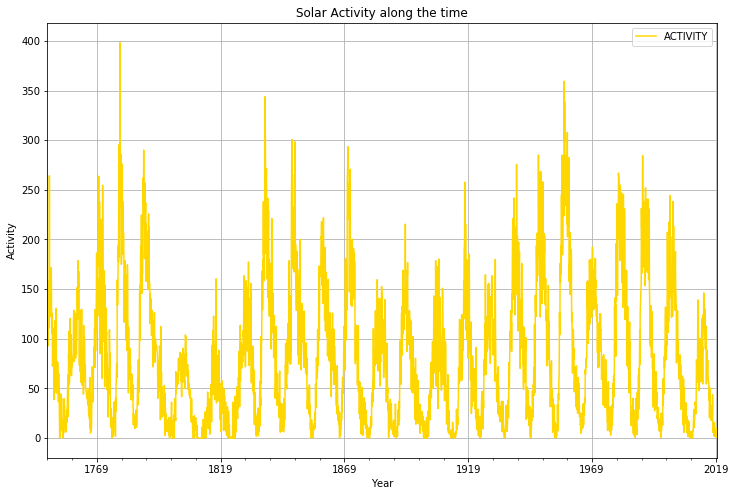

In [35]:
# It is super-easy to plo a pandas dataframe
fig, ax = plt.subplots(figsize=(12,8))
ax = df.plot(ax = ax,
             color = 'gold',
             title = 'Solar Activity along the time')
ax.set_xlabel('Year')
ax.set_ylabel('Activity')
ax.grid()
plt.show()

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Activity')

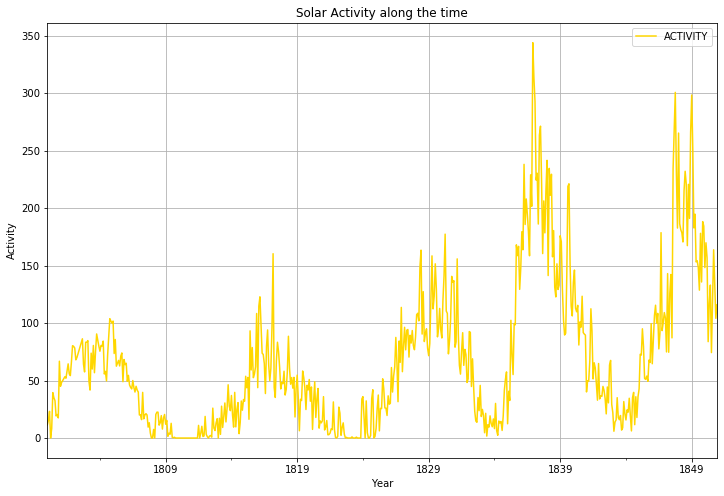

In [39]:
# We can filter before plotting
fig, ax = plt.subplots(figsize=(12,8))
ax = df.loc['1800':'1850'].plot(ax = ax,
             color = 'gold',
             title = 'Solar Activity along the time')
ax.set_xlabel('Year')
ax.set_ylabel('Activity')
ax.grid()
plt.show()

In [33]:
# Even though the data is monthly measured, you may see that pandas
# still does not know this, by looking at the statement freq = None
df.index
# Let's fix this
df = df.asfreq('M', method='ffill')
df.index

DatetimeIndex(['1749-01-01', '1749-02-01', '1749-03-01', '1749-04-01',
               '1749-05-01', '1749-06-01', '1749-07-01', '1749-08-01',
               '1749-09-01', '1749-10-01',
               ...
               '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01',
               '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
               '2019-06-01', '2019-07-01'],
              dtype='datetime64[ns]', length=3247, freq=None)

DatetimeIndex(['1749-01-31', '1749-02-28', '1749-03-31', '1749-04-30',
               '1749-05-31', '1749-06-30', '1749-07-31', '1749-08-31',
               '1749-09-30', '1749-10-31',
               ...
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30'],
              dtype='datetime64[ns]', length=3246, freq='M')

In [40]:
df_year = df.resample('Y').median()

Another method for smothing the signal is to consider a moving average.

In [41]:
df_5ymoving = df_year.rolling(5, center = True).mean()

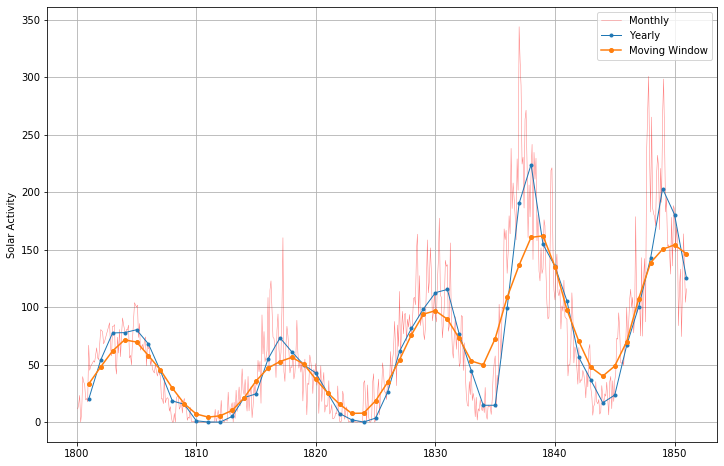

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df.loc['1800':'1850'],
linestyle='-', linewidth=0.5, color = "red", alpha = 0.5, label='Monthly')
ax.plot(df_year.loc['1800':'1850'],
marker='.', linestyle='-', linewidth=1, label='Yearly')
ax.plot(df_5ymoving.loc['1800':'1850'],
marker='o', markersize=4, linestyle='-', label='Moving Window')
ax.set_ylabel('Solar Activity')
ax.grid()
ax.legend();

(0, 200)

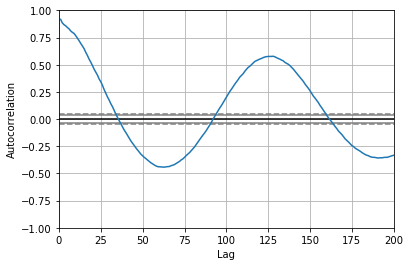

In [56]:
plt.close()
ax = pd.plotting.autocorrelation_plot(df)
ax.set_xlim([0,200])

(0, 20)

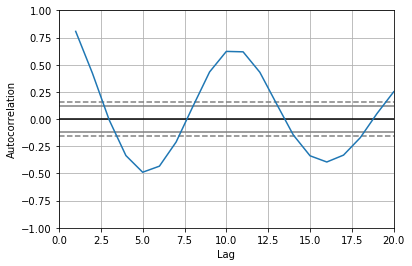

In [57]:
ax = pd.plotting.autocorrelation_plot(df_year)
ax.set_xlim([0,20])

(0, 20)

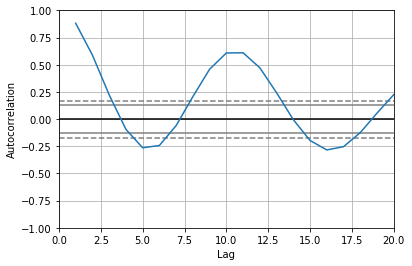

In [63]:
ax = pd.plotting.autocorrelation_plot(df_5ymoving.loc['1760':'1990'])
ax.set_xlim([0,20])

We have a very large dataset, it is very easy, either way, to find the periodicity of the signal. We showed above that the sunspot cycle has an 11 year cycle, analysing the monthly dataset, the yearly resampled dataset and the moving averaged. 

We used the autocorrelation method from pandas and everithing went fine. Let's try to understand a little bit better how this is working.

In [76]:
pd.Series(df_year['ACTIVITY']).autocorr(lag = 5)
pd.Series(df_year['ACTIVITY']).autocorr(lag = 16)

-0.49420779067149745

-0.40812653666588455